In [1]:
# Dependencies
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from census import Census


In [2]:
# Creating list of car makes, and testing list of all models for specific make

# car_prices_csv = "prices_clean.csv"
car_prices_csv = "combined_vehicle_data.csv"
car_prices_df = pd.read_csv(car_prices_csv)
# car_prices_df.head()
# print(car_prices_df.count())
car_makes = car_prices_df["make"].unique()
print(car_makes)
honda_df = car_prices_df.loc[car_prices_df["make"]==car_makes[17]]
honda_df
# honda_most_exp = honda_df.loc[honda_df["price"] == honda_df["price"].max()]
# honda_least_exp = honda_df.loc[honda_df["price"] == honda_df["price"].min()]
# print(honda_least_exp["model"].iloc[0])
# print(honda_most_exp)
# print(honda_least_exp)
# test = honda_df["price"].loc[honda_df["model"]=="Elevate"].iloc[0]
# print(test)

['Acura' 'Alfa Romeo' 'Aston Martin' 'Audi' 'Bentley' 'BMW' 'Bugatti'
 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge' 'Ferrari' 'Fiat' 'Ford'
 'Genesis' 'GMC' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'KIA'
 'Lamborghini' 'Land Rover' 'Lexus' 'Lincoln' 'Maserati' 'Mazda' 'Mclaren'
 'Mercedes' 'MINI' 'Nissan' 'Porsche' 'Rolls Royce' 'Subaru' 'Tesla'
 'Toyota' 'Volkswagen' 'Volvo']


,year,make,model,price,VClass
479,2023,Honda,Accord EX,29610,Large Cars
480,2023,Honda,Accord Hybrid Sport-L,33870,Large Cars
481,2023,Honda,Accord Sedan,28000,Large Cars
482,2023,Honda,City Hybrid,26640,NaN
483,2023,Honda,City Hybrid eHEV V,22970,NaN
484,2023,Honda,City Hybrid eHEV ZX,24770,NaN
485,2023,Honda,City Hybrid V CVT,26450,NaN
486,2023,Honda,City Hybrid ZX CVT,28520,NaN
487,2023,Honda,City SV,16260,NaN
488,2023,Honda,City V,17500,NaN


In [3]:
# Function to calculate monthly car payment
def monthly_pay(p,r,n):
    # p = Principal
    # r = Interest rate/12
    r = r/12
    # n = Loan term (months)
    return (p/((pow(1+r,n)-1)/(r*pow(1+r,n))))

# Assume 72 month (6-year) car loan term
# Assume 9.09% APR (Estimate based on credit rating 660-719)

# Principal
p = 20500
# Interest rate
r = 0.09
# Loan term (months)
n = 72
monthly_payment = monthly_pay(p,r,n)
monthly_payment

369.52351194957026

In [4]:
# Testing Monthly Payment Budget and Monthly Payment

# Assume average annual_income: $65k
# Assume 10% of monthly income budgeted for car payment
annual_income = 65000
monthly_income = annual_income/12
monthly_payment_budget = monthly_income*0.1
print(f"Monthly payment budget: {monthly_payment_budget}")

principal = honda_df["price"].loc[honda_df["model"]=="Elevate"].iloc[0]
interest_rate = 0.0909
loan_term = 72
monthly_payment = monthly_pay(principal,interest_rate,loan_term)
print(f"Monthly payment for Honda Elevate: {monthly_payment}")

Monthly payment budget: 541.6666666666667
Monthly payment for Honda Elevate: 262.5605489178993


In [20]:
# Function to create Dataframe of affordable models for specific make

def afford_models_for_make(car_prices_df,make,interest_rate,loan_term,monthly_payment_budget):
    models_df = car_prices_df.loc[car_prices_df["make"]==make]
    affordable_models = models_df.loc[monthly_pay(models_df["price"],interest_rate,loan_term) < monthly_payment_budget]
    return affordable_models

interest_rate = 0.0909
loan_term = 72
annual_income = 65000
monthly_income = annual_income/12
monthly_payment_budget = monthly_income*0.1
print(car_makes[0])
affordable_models = afford_models_for_make(car_prices_df,car_makes[17],interest_rate,loan_term,monthly_payment_budget)
affordable_models

Acura


,year,make,model,price,VClass
479,2023,Honda,Accord EX,29610,Large Cars
481,2023,Honda,Accord Sedan,28000,Large Cars
482,2023,Honda,City Hybrid,26640,NaN
483,2023,Honda,City Hybrid eHEV V,22970,NaN
484,2023,Honda,City Hybrid eHEV ZX,24770,NaN
485,2023,Honda,City Hybrid V CVT,26450,NaN
486,2023,Honda,City Hybrid ZX CVT,28520,NaN
487,2023,Honda,City SV,16260,NaN
488,2023,Honda,City V,17500,NaN
489,2023,Honda,City V CVT,16510,NaN


In [50]:
# Function to calculate and create Dataframe of percentage affordable of all cars
def percent_afford_per_make(car_prices_df,interest_rate,loan_term,monthly_payment_budget,car_makes):
    cars_percent_affordable = []

    for car in car_makes:
        car_df = car_prices_df.loc[car_prices_df["make"]==car]
        car_models = car_df.loc[monthly_pay(car_df["price"],interest_rate,loan_term) < monthly_payment_budget]
        percent_affordable = 100*(car_models.count()["model"])/(car_df.count()["model"])
        cars_percent_affordable.append(percent_affordable)

    # print(cars_percent_affordable)

    affordable_cars = {
        "Car Make":car_makes,
        "Percent Affordable":cars_percent_affordable
    }

    affordable_cars_df = pd.DataFrame(affordable_cars)
    return affordable_cars_df


# Assumptions:
#   9.09% APR (Estimate based on credit rating 660-719)
#   72 month (6-year) car loan term
#   $65k average annual income
#   10% of monthly income budgeted for car payment

interest_rate = 0.0909
loan_term = 72

annual_income = 65000
monthly_income = annual_income/12
monthly_payment_budget = monthly_income*0.1

# print(car_makes)

percent_afford_df = percent_afford_per_make(car_prices_df,interest_rate,loan_term,monthly_payment_budget,car_makes)
percent_afford_df

,Car Make,Percent Affordable
0,Acura,0.000000
1,Alfa Romeo,0.000000
2,Aston Martin,0.000000
3,Audi,0.000000
4,Bentley,0.000000
5,BMW,0.000000
6,Bugatti,0.000000
7,Buick,35.483871
8,Cadillac,0.000000
9,Chevrolet,20.000000


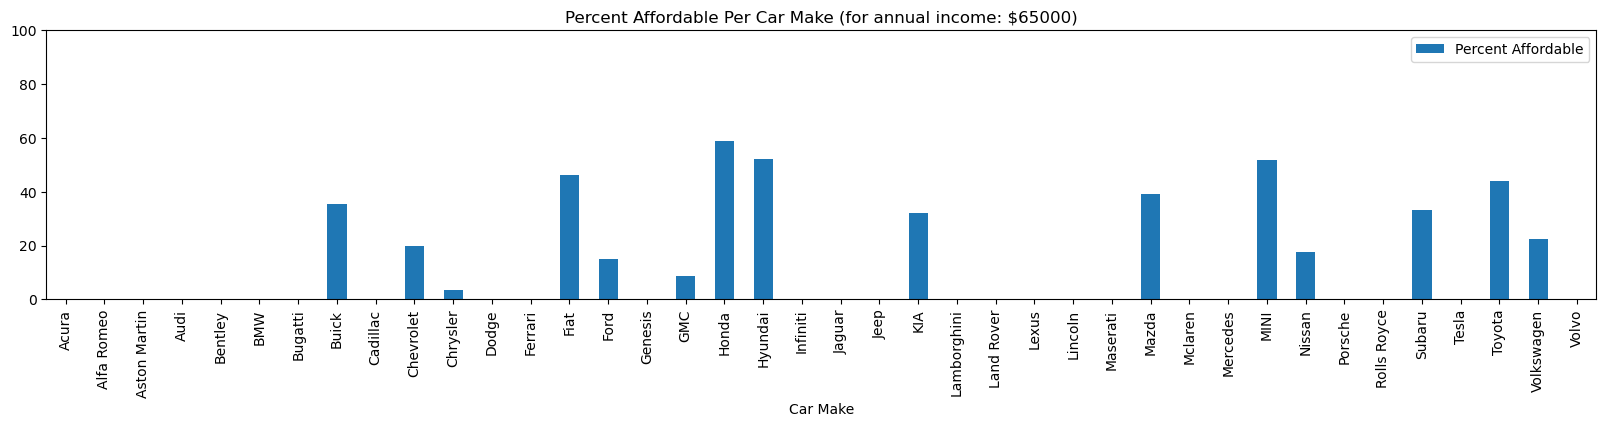

<Figure size 640x480 with 0 Axes>

In [51]:

percent_afford_df = percent_afford_df.set_index("Car Make")
percent_afford_df.head()

# Use DataFrame.plot() in order to create a bar chart of the data
percent_afford_df.plot(kind="bar", figsize=(20,3.5),ylim=(0,100))

# Set a title for the chart
plt.title(f"Percent Affordable Per Car Make (for annual income: ${annual_income})")

plt.show()
plt.tight_layout()


In [44]:
# Function to create Dataframe of affordable models for specific vehicle class

def afford_models_for_v_class(car_prices_df,v_class,interest_rate,loan_term,monthly_payment_budget):
    v_class_df = car_prices_df.loc[car_prices_df["VClass"]==v_class]
    v_class_afford = v_class_df.loc[monthly_pay(v_class_df["price"],interest_rate,loan_term) < monthly_payment_budget]
    return v_class_afford

interest_rate = 0.0909
loan_term = 72
annual_income = 65000
monthly_income = annual_income/12
monthly_payment_budget = monthly_income*0.1
v_class = car_prices_df["VClass"].dropna().unique()
print(v_class[1])

# print(car_makes[0])
affordable_v_class = afford_models_for_v_class(car_prices_df,v_class[0],interest_rate,loan_term,monthly_payment_budget)
affordable_v_class


Standard Sport Utility Vehicle 4WD


,year,make,model,price,VClass
259,2023,Chevrolet,Camaro 1LT Coupe,26900,Subcompact Cars
262,2023,Chevrolet,Camaro 2LT Coupe,28900,Subcompact Cars
403,2023,Ford,Mustang,27770,Subcompact Cars
404,2023,Ford,Mustang,27770,Subcompact Cars
405,2023,Ford,Mustang,27770,Subcompact Cars
406,2023,Ford,Mustang,27770,Subcompact Cars
407,2023,Ford,Mustang,27770,Subcompact Cars
922,2023,MINI,Cooper Classic Hardtop 4-Door,24400,Subcompact Cars
928,2023,MINI,Cooper Electric Hardtop,29900,Subcompact Cars
929,2023,MINI,Cooper Hardtop,23400,Subcompact Cars


In [48]:
# Function to calculate and create Dataframe of percentage affordable of vehicle classes

def percent_afford_per_vclass(car_prices_df,interest_rate,loan_term,monthly_payment_budget,v_class):
    cars_percent_affordable = []

    for type in v_class:
        # print(type)
        v_class_df = car_prices_df.loc[car_prices_df["VClass"]==type]
        v_class_afford = v_class_df.loc[monthly_pay(v_class_df["price"],interest_rate,loan_term) < monthly_payment_budget]
        # print(v_class_afford.count()["model"])
        # print(v_class_df.count()["model"])
        percent_affordable = 100*(v_class_afford.count()["model"])/(v_class_df.count()["model"])
        cars_percent_affordable.append(percent_affordable)

    # print(cars_percent_affordable)

    affordable_v_class = {
        "Vehicle Class":v_class,
        "Percent Affordable":cars_percent_affordable
    }

    affordable_v_class_df = pd.DataFrame(affordable_v_class)
    return affordable_v_class_df




# Assumptions:
#   9.09% APR (Estimate based on credit rating 660-719)
#   72 month (6-year) car loan term
#   $65k average annual income
#   10% of monthly income budgeted for car payment

interest_rate = 0.0909
loan_term = 72

annual_income = 65000
monthly_income = annual_income/12
monthly_payment_budget = monthly_income*0.1
v_class = car_prices_df["VClass"].dropna().unique()
# print(car_makes)
# print(v_class)

percent_v_class_afford_df = percent_afford_per_vclass(car_prices_df,interest_rate,loan_term,monthly_payment_budget,v_class)
percent_v_class_afford_df



,Vehicle Class,Percent Affordable
0,Subcompact Cars,18.000000
1,Standard Sport Utility Vehicle 4WD,0.000000
2,Small Sport Utility Vehicle 4WD,11.229947
3,Compact Cars,47.272727
4,Midsize Cars,13.245033
5,Small Sport Utility Vehicle 2WD,20.238095
6,Minicompact Cars,12.500000
7,Two Seaters,1.574803
8,Small Wagons,0.000000
9,Midsize Wagon,0.000000


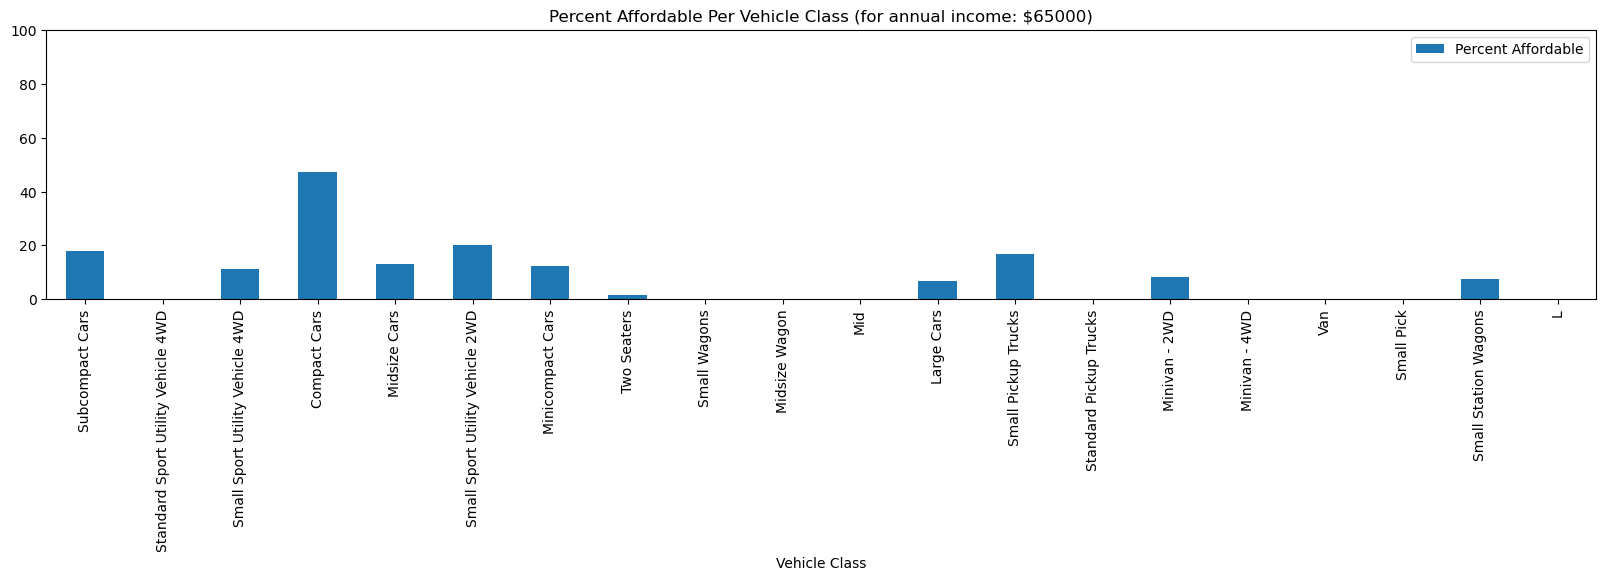

<Figure size 640x480 with 0 Axes>

In [49]:
percent_v_class_afford_df = percent_v_class_afford_df.set_index("Vehicle Class")
# percent_v_class_afford_df

# Use DataFrame.plot() in order to create a bar chart of the data
percent_v_class_afford_df.plot(kind="bar", figsize=(20,3.5),ylim=(0,100))

# Set a title for the chart
plt.title(f"Percent Affordable Per Vehicle Class (for annual income: ${annual_income})")

plt.show()
plt.tight_layout()